Let's First load the PSDs

In [1]:
%load_ext autoreload
%autoreload 2 

In [3]:
from AD_vibration.data_loader.data_loader import DataLoader, Sensor, get_processed_PSD
from datetime import datetime, timedelta
import numpy as np
Sxxs,dts=get_processed_PSD()

In [4]:
Sxxs.shape

(8049, 14, 3751)

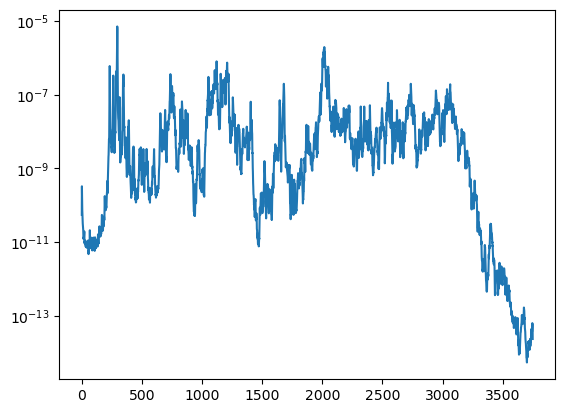

In [5]:
import matplotlib.pyplot as plt
psd_ex = Sxxs[0,7]
plt.plot(psd_ex)
plt.yscale('log')


In [6]:
mel_filter_num = 200

In [7]:
def freq_to_mel(freq):
    return 250.0 * np.log(1 + freq / 3)
def mel_to_freq(mel):
    return 3.0 * (np.exp(mel / 250.0) - 1)

Text(0, 0.5, 'Mel like frequency (Mel)')

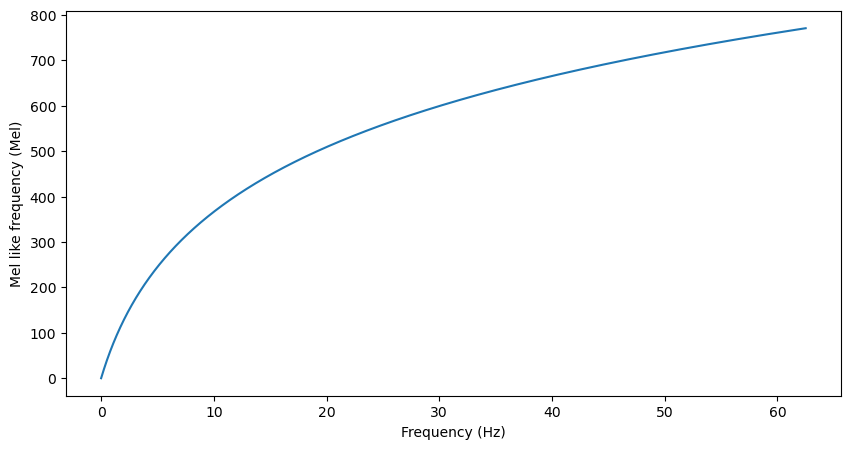

In [8]:
frequencies = np.linspace(0, 62.5, 3750)
mel_frequencies = freq_to_mel(frequencies)
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(frequencies,mel_frequencies)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Mel like frequency (Mel)')

In [9]:
def get_filter_points(fmin, fmax, n_mels,fft_size, fs=250):
    # Convert Hz to Mel
    min_mel = freq_to_mel(fmin)
    max_mel = freq_to_mel(fmax)
    # Equally spaced in Mel scale
    mels = np.linspace(min_mel, max_mel, n_mels)
    # Convert Mel to Hz
    freqs = mel_to_freq(mels)
    # Convert Hz to fft bin number
    return np.floor((fft_size + 1) * freqs / fs).astype(int) , freqs

In [11]:


filter_points, mel_freqs=get_filter_points(0,62,mel_filter_num,250*60)

In [12]:
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

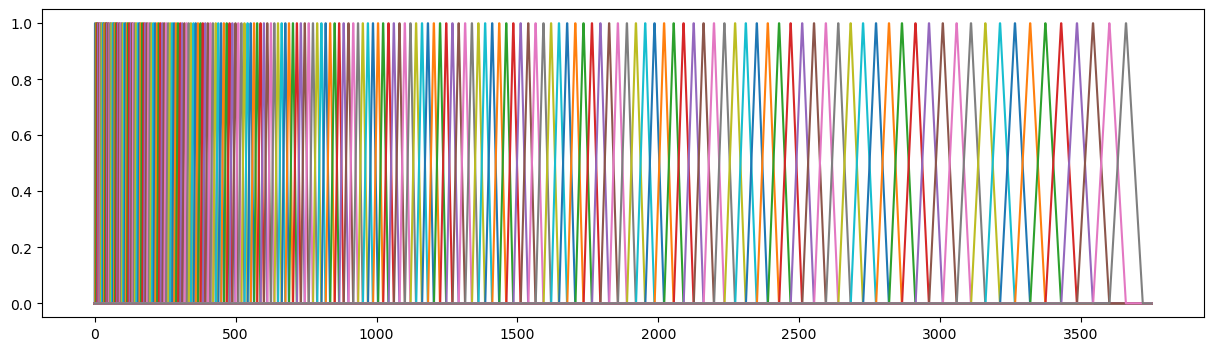

In [13]:


filters = get_filters(filter_points, 250*30)

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])



In [14]:
enorm = 2.0 / (mel_freqs[2:mel_filter_num] - mel_freqs[:mel_filter_num-2])
filters *= enorm[:, np.newaxis]

In [15]:
enorm

array([21.23476441, 20.90907998, 20.58839068, 20.2726199 , 19.96169219,
       19.65553329, 19.35407004, 19.05723043, 18.76494354, 18.47713955,
       18.19374971, 17.9147063 , 17.63994268, 17.36939319, 17.10299321,
       16.84067909, 16.58238817, 16.32805873, 16.07763003, 15.83104224,
       15.58823644, 15.34915464, 15.1137397 , 14.88193541, 14.65368637,
       14.42893805, 14.20763678, 13.98972968, 13.77516468, 13.56389054,
       13.35585678, 13.1510137 , 12.94931236, 12.75070459, 12.55514292,
       12.36258065, 12.17297176, 11.98627097, 11.80243367, 11.62141594,
       11.44317454, 11.26766688, 11.09485104, 10.92468573, 10.75713031,
       10.59214473, 10.4296896 , 10.26972608, 10.11221598,  9.95712167,
        9.80440608,  9.65403275,  9.50596574,  9.36016968,  9.21660974,
        9.07525162,  8.93606156,  8.79900631,  8.66405311,  8.53116973,
        8.40032443,  8.27148595,  8.1446235 ,  8.01970679,  7.89670596,
        7.77559164,  7.65633488,  7.5389072 ,  7.42328055,  7.30

Text(0, 0.5, 'Filter weight')

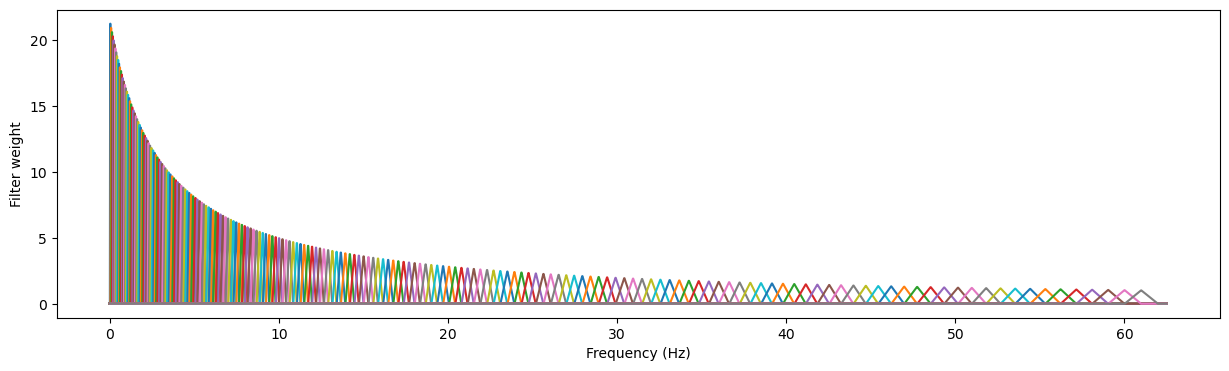

In [160]:
plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(np.linspace(0,62.5,3751),filters[n])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter weight')

In [1]:
enorm

NameError: name 'enorm' is not defined

In [157]:


audio_filtered = np.dot(filters, np.transpose(Sxxs[0]))
audio_log = 10.0 * np.log10(audio_filtered)

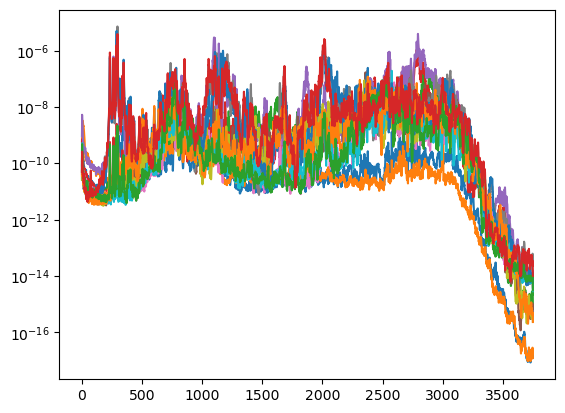

In [175]:
plt.plot((Sxxs[0].T))
plt.yscale('log')

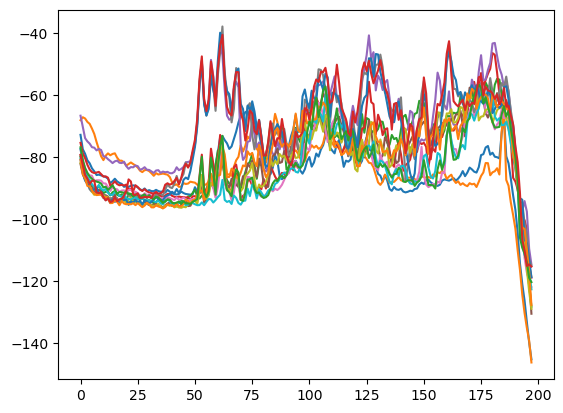

In [158]:
plt.plot(audio_log)

In [125]:
filtered = []
for psd in Sxxs:
    audio_filtered = np.dot(filters, np.transpose(psd))
    audio_log = 10.0 * np.log10(audio_filtered)
    filtered.append(audio_log.T)


In [128]:
np.save('mel.npy',np.stack(filtered))